In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyaxions import jaxions as pa
import importlib

In [14]:
def checkNV(file,k0, kl, nn):
    if (pa.gm(file,'ftype') == 'Axion'):
        la = '_0'
    else :
        la = '_Bal_4.00'
    K = pa.gm(file,'nspK'+la)
    G = pa.gm(file,'nspG'+la)
    V = pa.gm(file,'nspV'+la)
#     w  = np.sqrt(kl**2 + mA*mA*R*R)
    return (k0*kl*kl*(K+G+V)/(2*np.pi**2)/nn).sum()
def NV(mf, k0, kl, nn):
    hi = []
    for f in mf:
        hi.append(checkNV(f,k0, kl, nn))
    return np.array(hi)

In [26]:
mf = pa.findmfiles('cout')
print(mf[-1])
smf = []
if(pa.gm(mf[0],'ftype') == 'Saxion'):
    smf = mf[pa.gml(mf,'ftype') == 'Saxion']
    print(smf[-1])
amf = []
if(pa.gm(mf[-1],'ftype') == 'Axion'):
    amf = mf[pa.gml(mf,'ftype') == 'Axion']
    print(amf[0])
nn = pa.gm(mf[0],'nmodelist')
kl = pa.gm(mf[0],'klist')
k0 = pa.gm(mf[0],'k0')

cout/m/axion.m.00060
cout/m/axion.m.00000


In [27]:
# pa.aximcontent(mf[0])
# pa.gm(mf[0],'nsp_info')

Text(0.5, 1.0, '$N_A/V$')

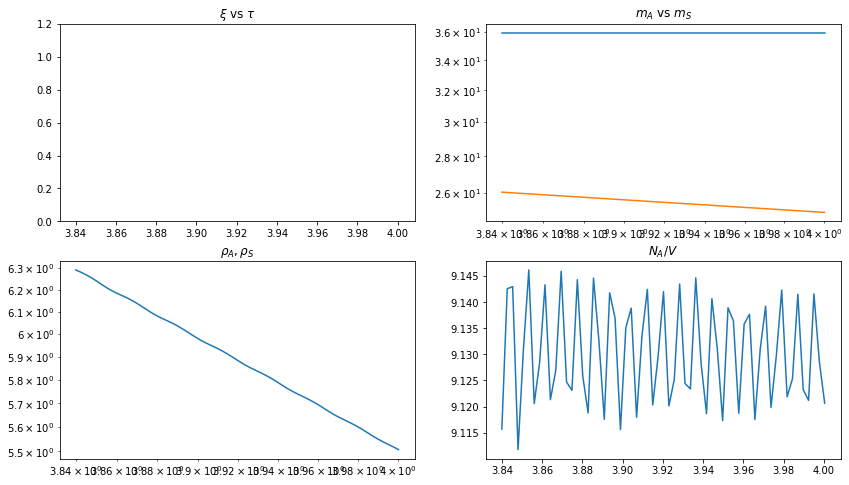

In [28]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax[0,0].plot(pa.gml(smf,'ct'),pa.gml(smf,'xi'))
ax[0,0].plot(pa.gml(mf,'ct'),40*(pa.gml(mf,'massA')/pa.gml(mf,'massS'))**2,'--')
ax[0,0].set_ylim(0,1.2)
ax[0,1].loglog(pa.gml(mf,'ct'),pa.gml(mf,'massA'))
ax[0,1].loglog(pa.gml(mf,'ct'),pa.gml(mf,'massS'))
ax[1,0].loglog(pa.gml(mf,'ct'),pa.gml(mf,'eA'))
ax[1,0].loglog(pa.gml(mf,'ct'),pa.gml(mf,'eS'))
ax[1,1].plot(pa.gml(mf,'ct'), NV(mf, k0, kl, nn))
ax[0,0].set_title(r'$\xi$ vs $\tau$')
ax[0,1].set_title(r'$m_A$ vs $m_S$')
ax[1,0].set_title(r'$\rho_A, \rho_S$')
ax[1,1].set_title(r'$N_A/V$')

Text(0.5, 1.0, '$\\rho/\\bar\\rho$')

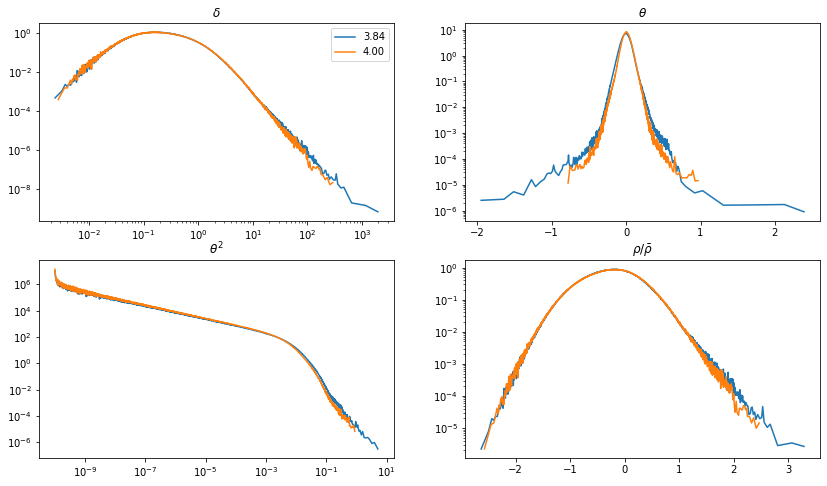

In [30]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
it = 10
for f in [amf[1],amf[-1]]:
    th = pa.glbin(f,'bincontB');ax[0,0].loglog(th[:,0],th[:,1],label='%.2f'%pa.gm(f,'ct'))
    th = pa.gbin(f,'binthetaB');ax[0,1].semilogy(th[:,0],th[:,1])
    th = pa.glbin(f,'binlogtheta2B');ax[1,0].loglog(th[:,0],th[:,1])
    th = pa.gbin(f,'bincontB');ax[1,1].semilogy(th[:,0],th[:,1])
ax[0,0].set_title(r'$\delta$');ax[0,0].legend()
ax[0,1].set_title(r'$\theta$')
ax[1,0].set_title(r'$\theta^2$')
ax[1,1].set_title(r'$\rho/\bar\rho$')

Text(0.5, 1.0, '$\\partial \\rho_G/\\partial k$')

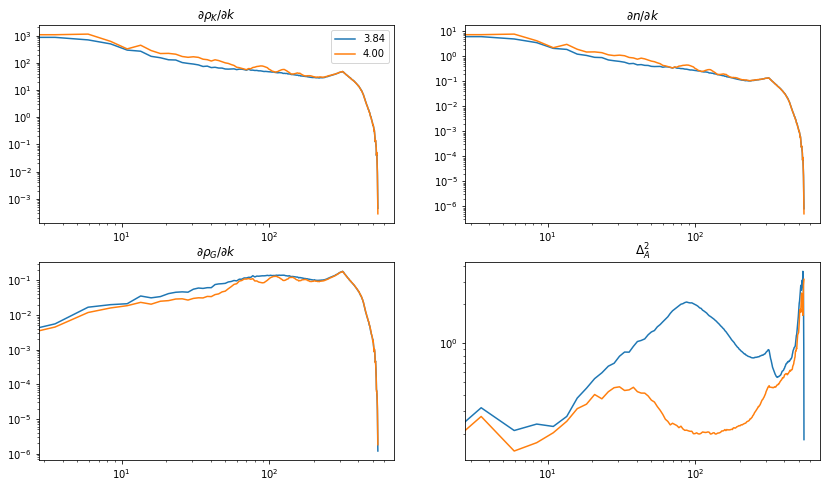

In [31]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
it = 10
for f in [amf[0],amf[-1]]:
    la=''
    if (pa.gm(f,'ftype')=='Saxion'): 
        la = 'Bal_4.0'
    ax[0,0].loglog(kl,pa.gm(f,'espK_'+'0'),label='%.2f'%pa.gm(f,'ct'))    
    ax[0,1].loglog(kl,pa.gm(f,'nspK_'+'0'))
    ax[1,0].loglog(kl,pa.gm(f,'nspG_'+'0'))
    psp = kl**3*pa.gm(f,'psp')/nn/(2*np.pi**2*pa.gm(f,'eA')**2)
    ax[1,1].loglog(kl,psp)
ax[0,0].set_title(r'$\partial \rho_K/\partial k$');ax[0,0].legend()
ax[0,1].set_title(r'$\partial n/\partial k$')
ax[1,1].set_title(r'$\Delta_A^2$')
ax[1,0].set_title(r'$\partial \rho_G/\partial k$')

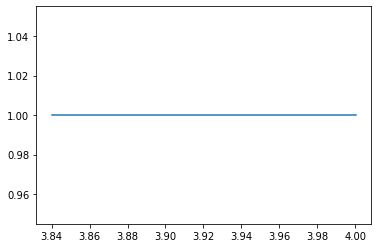

In [32]:
plt.plot(pa.gml(mf,'ct'),pa.gml(mf,'R')/pa.gml(mf,'ct'))

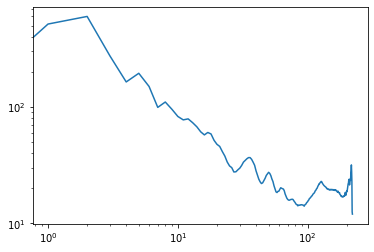

In [33]:
# plt.loglog(kl**2*pa.gm(mf[0],'espK_0')/nn)
plt.loglog(kl**2*pa.gm(mf[-1],'espK_0')/nn)

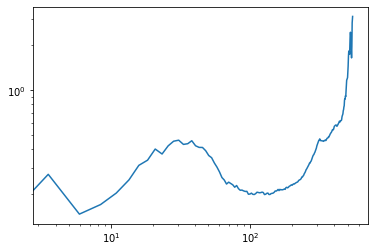

In [34]:
# plt.loglog(kl,kl**3*pa.gm(mf[0],'psp')/nn/(2*np.pi**2*pa.gm(mf[0],'eA')**2))
plt.loglog(kl,kl**3*pa.gm(mf[-1],'psp')/nn/(2*np.pi**2*pa.gm(mf[-1],'eA')**2))
# plt.loglog(kl,kl**3*pa.gm(cf[0],'psp')/nn/(2*np.pi**2*pa.gm(cf[0],'eA')**2))

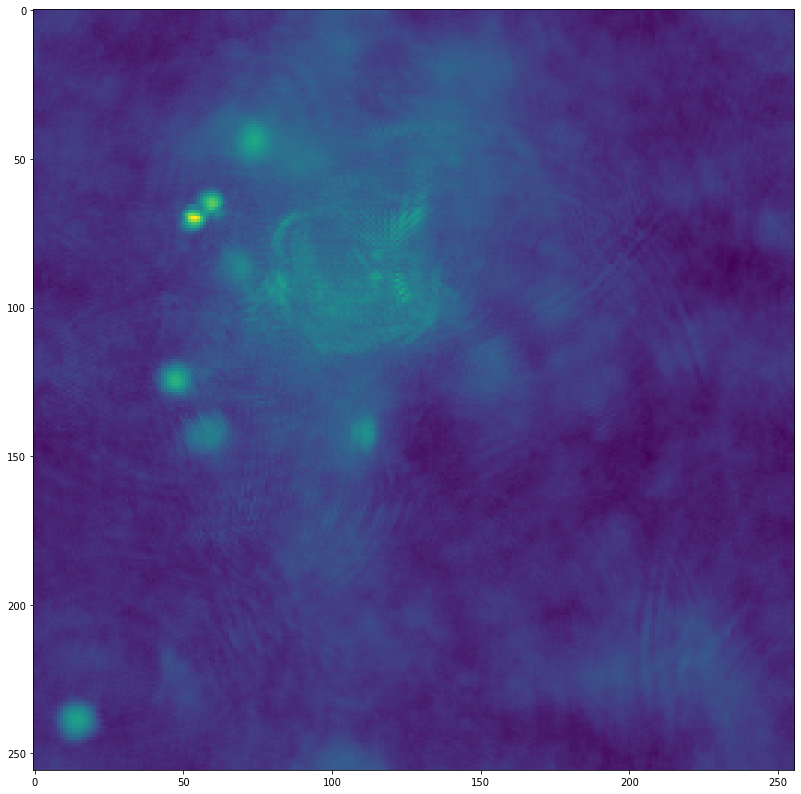

In [38]:
fig,ax = plt.subplots(1,figsize=(14,14))
plt.imshow(np.log(pa.gm(amf[0],'slice//map/P')))